# Exercise 5.02: Logistic Regression as a Classifier - 2 Class Classifier

In [1]:
import struct
import numpy as np
import gzip
import urllib.request
import matplotlib.pyplot as plt
from array import array
from sklearn.linear_model import LogisticRegression

## Prepare the MNIST data for training
The following 4 cells will download the save the MNIST training data to file.  Once you have run these cells once successfully you can delete or comment them out.

Download the image files

In [2]:
import os

In [3]:
request = urllib.request.urlopen('http://yann.lecun.com/exdb/mnist/train-images-idx3-ubyte.gz')

with open('../Datasets/train-images-idx3-ubyte.gz', 'wb') as f:
    f.write(request.read())

request = urllib.request.urlopen('http://yann.lecun.com/exdb/mnist/t10k-images-idx3-ubyte.gz')

with open('../Datasets/t10k-images-idx3-ubyte.gz', 'wb') as f:
    f.write(request.read())

Download the label files

In [4]:
request = urllib.request.urlopen('http://yann.lecun.com/exdb/mnist/train-labels-idx1-ubyte.gz')

with open('../Datasets/train-labels-idx1-ubyte.gz', 'wb') as f:
    f.write(request.read())

request = urllib.request.urlopen('http://yann.lecun.com/exdb/mnist/t10k-labels-idx1-ubyte.gz')

with open('../Datasets/t10k-labels-idx1-ubyte.gz', 'wb') as f:
    f.write(request.read())

In [5]:
!ls *.gz # or !dir *.gz for windows

ls: *.gz: No such file or directory


Load the downloaded data

In [6]:
with gzip.open('../Datasets/train-images-idx3-ubyte.gz', 'rb') as f:
    magic, size, rows, cols = struct.unpack(">IIII", f.read(16))
    img = np.array(array("B", f.read())).reshape((size, rows, cols))

with gzip.open('../Datasets/train-labels-idx1-ubyte.gz', 'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    labels = np.array(array("B", f.read()))

with gzip.open('../Datasets/t10k-images-idx3-ubyte.gz', 'rb') as f:
    magic, size, rows, cols = struct.unpack(">IIII", f.read(16))

    img_test = np.array(array("B", f.read())).reshape((size, rows, cols))

with gzip.open('../Datasets/t10k-labels-idx1-ubyte.gz', 'rb') as f:
    magic, size = struct.unpack(">II", f.read(8))
    labels_test = np.array(array("B", f.read()))

Visualise a sample of the data

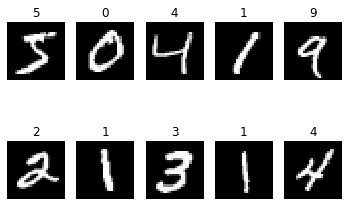

In [7]:
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(img[i], cmap='gray');
    plt.title(f'{labels[i]}');
    plt.axis('off')

## Construct a Logistic Model to Classify Digits 0  - 9

In this model as we are predicting classes 0 - 9 we will require images from all available data.  However given the extremely large dataset we will need to sample only a small amount of the original MNIST set due to limited system requirements and anticipated training time.  We will select 2000 samples at random:

In [8]:
samples_0_1 = np.where((labels == 0) | (labels == 1))[0]
images_0_1 = img[samples_0_1]
labels_0_1 = labels[samples_0_1]

samples_0_1_test = np.where((labels_test == 0) | (labels_test == 1))
images_0_1_test = img_test[samples_0_1_test].reshape((-1, rows * cols))
labels_0_1_test = labels_test[samples_0_1_test]

Visualising the selected information:

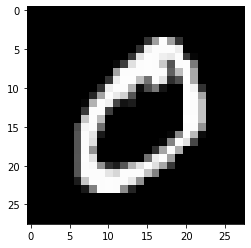

In [9]:
sample_0 = np.where((labels == 0))[0][0]
plt.imshow(img[sample_0], cmap='gray');

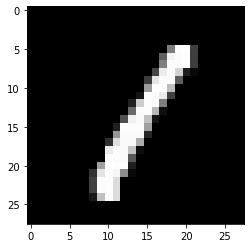

In [10]:
sample_1 = np.where((labels == 1))[0][0]
plt.imshow(img[sample_1], cmap='gray');

In order to provide the image information to the Logistic model we must first flatten the data out so that each image is 1 x 784 pixels in shape.

In [11]:
images_0_1 = images_0_1.reshape((-1, rows * cols))
images_0_1.shape

(12665, 784)

Let's construct the model, use the sklearn LogisticRegression API and call the fit function.

In [12]:
model = LogisticRegression(solver='liblinear')
model.fit(X=images_0_1, y=labels_0_1)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Determine the score against the training set

In [13]:
model.score(X=images_0_1, y=labels_0_1)

1.0

Display the first two predictions for the Logistic model against the training data

In [14]:
model.predict(images_0_1) [:2]

array([0, 1], dtype=uint8)

Examine the corresponding predicted probabilities for the first two training samples

In [15]:
model.predict_proba(images_0_1)[:2]

array([[9.99999999e-01, 9.89532857e-10],
       [4.56461358e-09, 9.99999995e-01]])

Compare the performance against the test set

In [16]:
model.score(X=images_0_1_test, y=labels_0_1_test)

0.9995271867612293